# Crime Statistic Visualization
Created as homework for Bill Howe's Visualization course on coursera.

I make observations about the incident data for San Fransisco, CA for summer 2014. After reviewing the crime categories, I show that there is a rise of crime during the evening hours and that most crime incidents occur near the downtown area.

In [1]:
import pandas as pd
sf_crime = pd.read_csv("sanfrancisco_incidents_summer_2014.csv")
#se_crime = pd.read_csv("seattle_incidents_summer_2014.csv")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline
sf_crime.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000


The important columns are the nominals: Category and PdDistrict, ordinals: DayOfWeek and Date, and the scalars: Time, X, and Y 

# Categories of Crime Reported
The San Francisco dataset is organized by Category with a description that further identifies the type of crime. The chart below shows the top 15 crime categories.

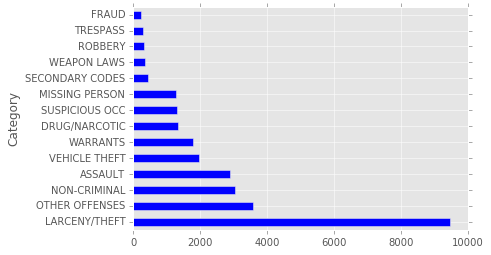

In [2]:
sf_crimes_group = sf_crime.groupby("Category")
sf_crimes_size = sf_crimes_group.size()

sf_crimes_size.sort_values(inplace=True,ascending=False)
sf_crimes_size[:14].plot(kind='barh')

# Hard crime incidents increase during the evening hours
From the chart above, I chose 5 serious crime categories to examine over the hours of the day.

In [3]:
hours = pd.to_numeric(sf_crime["Time"].str.split(":").str[0])
sf_crime['hour']=hours
d = {}
categories = ["LARCENY/THEFT", "ASSAULT", "VEHICLE THEFT", "DRUG/NARCOTIC","ROBBERY"]
for c in categories:
    d[c] = sf_crime[sf_crime.Category==c]["hour"]
df = pd.DataFrame(d)

## Total crime
The stacked bar chart below shows that the peak period is about 6pm. Crime steadily rises from about 9am to 4pm and there is a steep rise that falls off to the 4pm level again around midnight. There is a steep decline until about 4 am. 

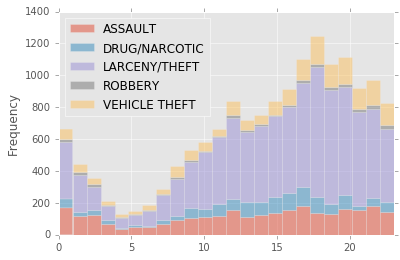

In [4]:
df.plot(kind="hist", alpha=0.5,stacked=True,bins=24,xlim=(0,23))

## Crime Trends Comparison
The individual charts below shows that most of the crimes follow this same trend. However, robbery incidents tend to increase later in the night and stay peaked until 3am. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10bac4d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b9a1d50>], dtype=object)

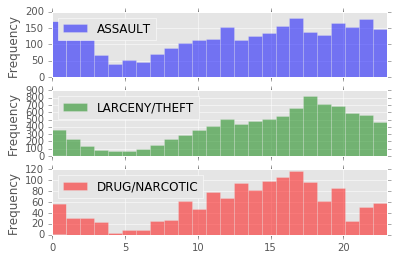

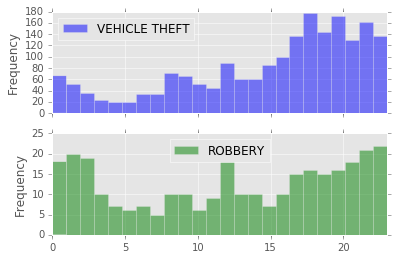

In [5]:
dfa = df[['ASSAULT','LARCENY/THEFT','DRUG/NARCOTIC']]
dfb = df[['VEHICLE THEFT','ROBBERY']]
dfa.plot(kind="hist",alpha=0.5,stacked=False,bins=24,xlim=(0,23),subplots=True)
dfb.plot(kind="hist",alpha=0.5,stacked=False,bins=24,xlim=(0,23),subplots=True)
#dfc.plot(kind="hist",alpha=0.5,stacked=False,bins=24,xlim=(0,23),subplots=True)


# Most crimes happen in the inner city
The chart below shows crime statistics by police district. The top four districts are in the northwest part of San Fransisco which corresponds to the downtown area. The bottom three districts are all on the east side and furtherest away from the downtown area.

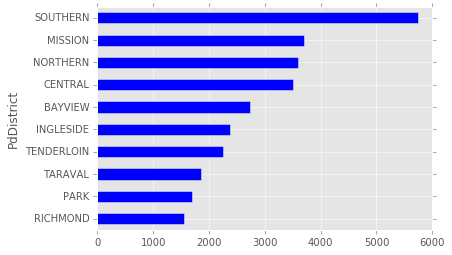

In [6]:
byDist = sf_crime.groupby("PdDistrict").size()
byDist.sort_values(inplace=True)
byDist.plot(kind="barh")

## Binning geographically
The plot below shows that the majority of incidents occur around a point that corresponds to the city's downtown area.

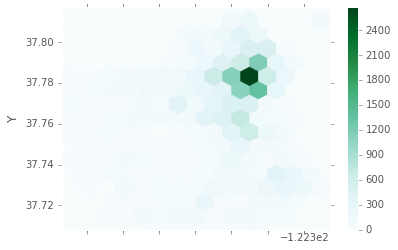

In [7]:
sf_crime.plot(kind='hexbin', x='X',y='Y',gridsize=15)